In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import Imputer
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer  

In [2]:
df=pd.read_csv('bank-full.csv')

In [3]:
df.shape

(45211, 17)

In [4]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [5]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [6]:
# There is no missing value in the data

In [7]:
df.describe().transpose() # 5 point summary of the data

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [8]:
#To check the presence of outliers

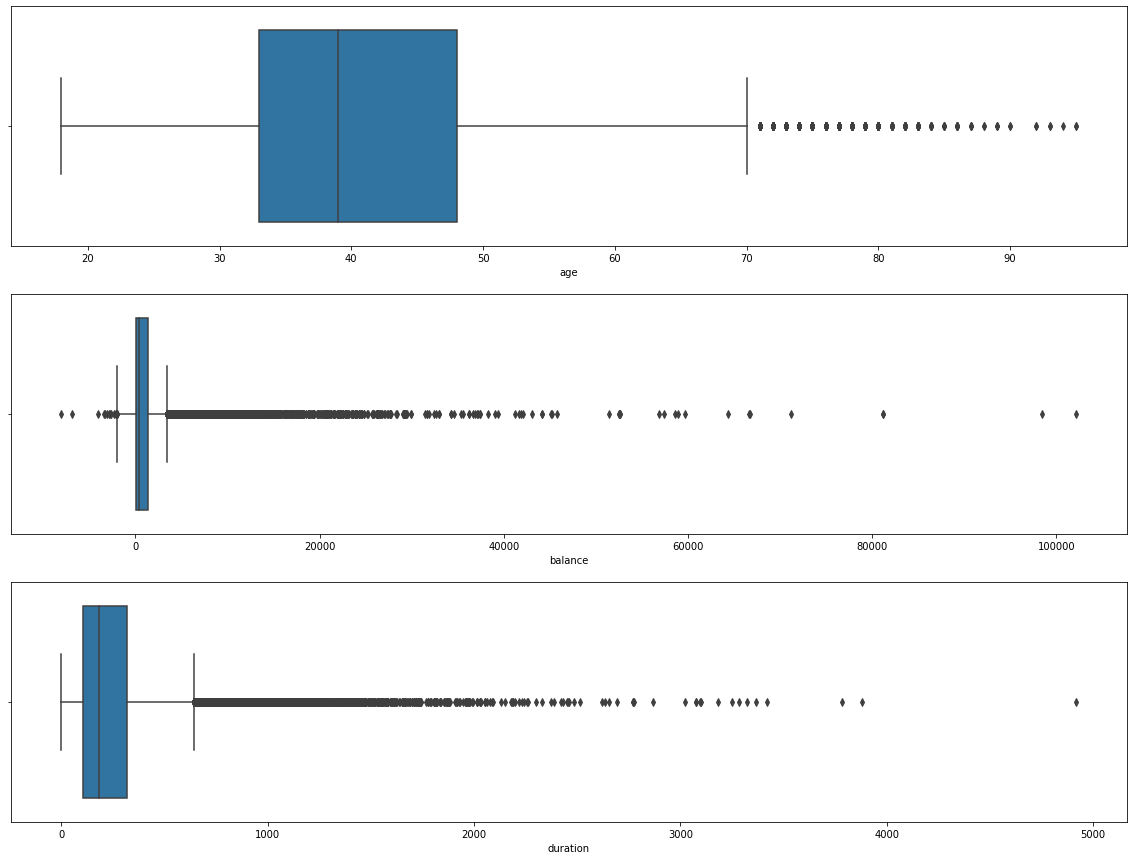

In [9]:
plt.figure(figsize= (20,15))
plt.subplot(3,1,1)
sns.boxplot(x= df.age)

plt.subplot(3,1,2)
sns.boxplot(x= df.balance)

plt.subplot(3,1,3)
sns.boxplot(x= df.duration)

plt.show()

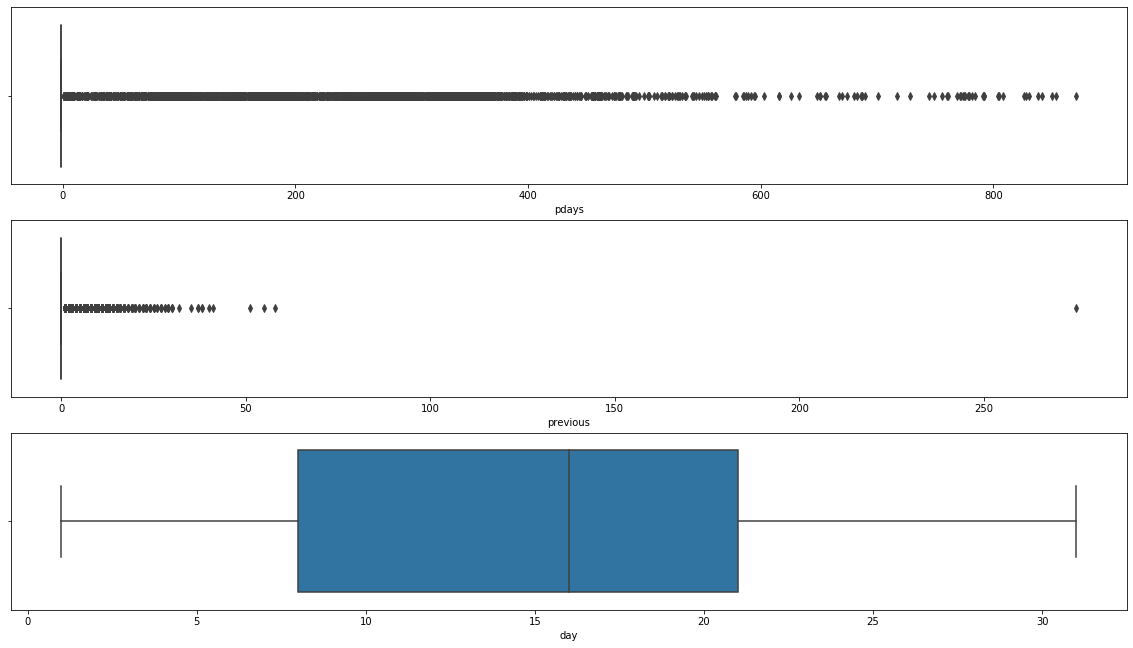

In [10]:
plt.figure(figsize= (20,15))
plt.subplot(4,1,1)
sns.boxplot(x= df.pdays)

plt.subplot(4,1,2)
sns.boxplot(x= df.previous)

plt.subplot(4,1,3)
sns.boxplot(x= df.day)

plt.show()

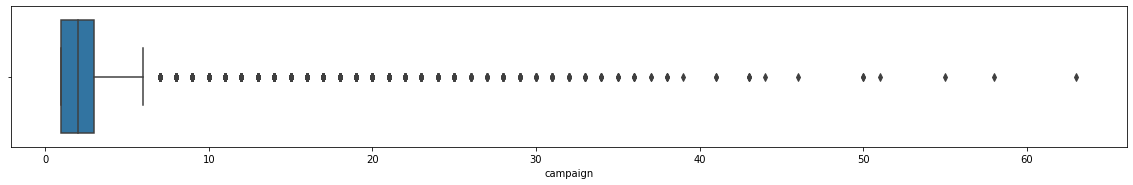

In [11]:
plt.figure(figsize= (20,15))
plt.subplot(5,1,1)
sns.boxplot(x= df.campaign)


In [12]:
# Age,balance,duration,pdays,previous and campaign contain outliers

In [13]:
df['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [14]:
df['poutcome']=df['poutcome'].replace('other','unknown')
df['poutcome'].value_counts()
# Creating a more balanced poutcome variable

unknown    38799
failure     4901
success     1511
Name: poutcome, dtype: int64

In [15]:
df[['pdays']]=abs(df[['pdays']])
df.head(5)
# Changing negative values to positive in pdays

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,1,0,unknown,no


In [16]:
df['job']=df['job'].replace('admin.','admin')
df['job']=df['job'].replace('blue-collar','blue collar')

In [17]:
df.Target = df.Target.astype('category')
df.job = df.job.astype('category')
df.marital = df.marital.astype('category')
df.education = df.education.astype('category')
df.default = df.default.astype('category')
df.housing = df.housing.astype('category')
df.loan = df.loan.astype('category')
df.contact = df.contact.astype('category')
df.month = df.month.astype('category')
df.poutcome = df.poutcome.astype('category')



In [18]:
df.dtypes

age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact      category
day             int64
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
Target       category
dtype: object

In [19]:
for value in ['job']:
    print(value,":", sum(df[value] == 'admin'))
    print(value,":", sum(df[value] == 'blue collar'))

job : 5171
job : 9732


In [20]:
le = preprocessing.LabelEncoder()
job_cat = le.fit_transform(df.job)
marital_cat = le.fit_transform(df.marital)
education_cat   = le.fit_transform(df.education)
default_cat = le.fit_transform(df.default)
housing_cat = le.fit_transform(df.housing)
loan_cat = le.fit_transform(df.loan)
contact_cat = le.fit_transform(df.contact)
month_cat = le.fit_transform(df.month)
poutcome_cat = le.fit_transform(df.poutcome)

In [21]:
df['job_cat'] = job_cat
df['marital_cat'] = marital_cat
df['education_cat'] = education_cat
df['default_cat'] = default_cat
df['housing_cat'] = housing_cat
df['loan_cat'] = loan_cat
df['contact_cat'] = contact_cat
df['month_cat'] = month_cat
df['poutcome_cat'] = poutcome_cat

In [22]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,Target,job_cat,marital_cat,education_cat,default_cat,housing_cat,loan_cat,contact_cat,month_cat,poutcome_cat
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,no,4,1,2,0,1,0,2,8,2
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,no,9,2,1,0,1,0,2,8,2
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,no,2,1,1,0,1,1,2,8,2
3,47,blue collar,married,unknown,no,1506,yes,no,unknown,5,...,no,1,1,3,0,1,0,2,8,2
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,no,11,2,3,0,0,0,2,8,2


In [23]:
dummy_fields = ['job','marital','education','default','housing','loan', 'contact', 'month','poutcome']
df = df.drop(dummy_fields, axis = 1)

In [24]:
df.head()

,age,balance,day,duration,campaign,pdays,previous,Target,job_cat,marital_cat,education_cat,default_cat,housing_cat,loan_cat,contact_cat,month_cat,poutcome_cat
0,58,2143,5,261,1,1,0,no,4,1,2,0,1,0,2,8,2
1,44,29,5,151,1,1,0,no,9,2,1,0,1,0,2,8,2
2,33,2,5,76,1,1,0,no,2,1,1,0,1,1,2,8,2
3,47,1506,5,92,1,1,0,no,1,1,3,0,1,0,2,8,2
4,33,1,5,198,1,1,0,no,11,2,3,0,0,0,2,8,2


In [25]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(df.drop('Target',axis=1), df['Target'], test_size=.30,
                                                   random_state=22)
X_train.shape,X_test.shape

((31647, 16), (13564, 16))

In [26]:
model_entropy=DecisionTreeClassifier(criterion='entropy')

In [27]:
model_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [28]:
model_entropy.score(X_train, y_train)

1.0

In [29]:
model_entropy.score(X_test, y_test) 

0.8759215570628134

In [30]:
clf_pruned = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_pruned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [32]:
#Applying Adaboost ensemble algorithm and printing the accuracy
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier( n_estimators= 100, learning_rate=0.1, random_state=22)
abcl = abcl.fit(X_train, y_train)

In [33]:
pred_AB =abcl.predict(X_test)
acc_AB = accuracy_score(y_test, pred_AB)

In [34]:
print(acc_AB)

0.8883072839870245


In [35]:
#Applying Bagging ensemble algorithm and printing the accuracy
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
bgcl = bgcl.fit(X_train, y_train)

In [36]:
pred_BG =bgcl.predict(X_test)
acc_BG = accuracy_score(y_test, pred_BG)

In [42]:
print(acc_BG)

0.9046004128575641


In [38]:
#Applying Gradient boosting ensemble algorithm and printing the accuracy
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22)
gbcl = gbcl.fit(X_train, y_train)

In [39]:
pred_GB =gbcl.predict(X_test)
acc_GB = accuracy_score(y_test, pred_GB)

In [40]:
print(acc_GB)

0.8998083161309348


In [41]:
#For this dataset Bagging and Gradient boosting gives the best results.